https://keras.io/

tensorflow, theanonをベースにした深層学習フレームワーク

http://aidiary.hatenablog.com/entry/20161109/1478696865

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 100

# MNISTデータのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 画像を1次元配列化
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Using TensorFlow backend.


60000 train samples
10000 test samples


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.visualize_util import plot

def build_multilayer_perceptron():
    model = Sequential()

    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

# 多層ニューラルネットワークモデルを構築
model = build_multilayer_perceptron()

# モデルのサマリを表示
model.summary()
plot(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# モデルをコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
___________________________________________________________________________________________

In [3]:
# pip install pydot pydot-ng graphviz
# brew install graphviz

In [4]:
# Early-stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=0, verbose=1)

# モデルの訓練
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 21s - loss: 0.2633 - acc: 0.9202 - val_loss: 0.0899 - val_acc: 0.9745
Epoch 2/100
54000/54000 [==============================] - 21s - loss: 0.1088 - acc: 0.9662 - val_loss: 0.0847 - val_acc: 0.9750
Epoch 3/100
54000/54000 [==============================] - 21s - loss: 0.0755 - acc: 0.9764 - val_loss: 0.0710 - val_acc: 0.9775
Epoch 4/100
54000/54000 [==============================] - 21s - loss: 0.0565 - acc: 0.9822 - val_loss: 0.0653 - val_acc: 0.9812
Epoch 5/100
54000/54000 [==============================] - 21s - loss: 0.0474 - acc: 0.9848 - val_loss: 0.0708 - val_acc: 0.9800


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

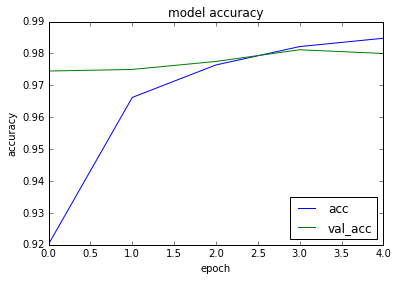

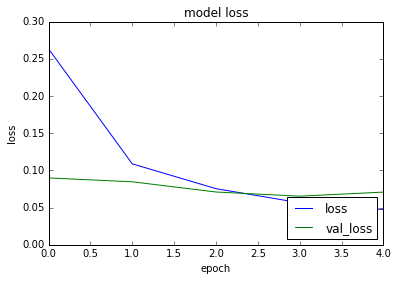

In [7]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)